In [242]:
# import all the necessary libraries for the logistic regression model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [243]:
# read and clean the datafile into pandas dataframe
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df[df['tenure'] != 0]
df.shape

(7032, 21)

In [259]:
# transform the categorical columns into numerical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded.head()


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,True,False,False,True,True,...,False,False,False,True,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.5,False,True,True,False,True,...,True,False,True,False,False,False,False,True,True,False
2,3668-QPYBK,0,2,53.85,108.15,False,True,True,False,True,...,False,False,False,True,False,False,False,True,False,True
3,7795-CFOCW,0,45,42.30,1840.75,False,True,True,False,True,...,True,False,True,False,True,False,False,False,True,False
4,9237-HQITU,0,2,70.70,151.65,True,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True


In [245]:
# Drop the redundant columns from df_encoded
columns_to_drop = [
    'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 
    'MultipleLines_No', 'MultipleLines_No phone service', 
    'OnlineSecurity_No internet service', 'OnlineSecurity_No', 'InternetService_No',
    'OnlineBackup_No', 'OnlineBackup_No internet service', 
    'DeviceProtection_No', 'DeviceProtection_No internet service', 
    'TechSupport_No', 'TechSupport_No internet service', 
    'StreamingTV_No', 'StreamingTV_No internet service', 
    'StreamingMovies_No', 'StreamingMovies_No internet service', 
    'PaperlessBilling_No', 'Churn_No', 'customerID'
]
df_encoded.drop(columns=columns_to_drop, inplace=True)
df_encoded.dtypes

# Change the datatype of TotalCharges into float
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')
df_encoded.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Male                                   bool
Partner_Yes                                   bool
Dependents_Yes                                bool
PhoneService_Yes                              bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
OnlineSecurity_Yes                            bool
OnlineBackup_Yes                              bool
DeviceProtection_Yes                          bool
TechSupport_Yes                               bool
StreamingTV_Yes                               bool
StreamingMovies_Yes                           bool
Contract_Month-to-month                       bool
Contract_One year                             bool
Contract_Two year              

In [246]:
# Separate features (X) and target (y)
X = df_encoded.drop("Churn_Yes", axis=1)  
y = df_encoded["Churn_Yes"]         
#Train-test split
#20% will do in to the test set, and the remaining 80% will be uesd for training the model     
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [248]:
# Create the model
my_model = LogisticRegression(
    penalty='l2',       # standard L2 regularization
    C=1.0,              # inverse of regularization strength
    solver='lbfgs',     # common solver for small- to medium-sized datasets
    max_iter=1000,      # increase if solver needs more iterations
    random_state=42
)
# Fit the model on the training data
my_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [251]:
y_pred = my_model.predict(X_test)

In [252]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[914 119]
 [159 215]]


In [253]:
report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.88      0.87      1033
       Churn       0.64      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [254]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8024


In [256]:
from sklearn.metrics import roc_auc_score

y_prob = my_model.predict_proba(X_test)[:, 1]  # get probabilities for class "1"
auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {auc:.4f}")


ROC AUC: 0.8368


In [258]:
coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': my_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Top positive coefficients indicating higher churn probability:")
print(coeffs.head(10))
print()
print("Top negative coefficients indicating lower churn probability:")
print(coeffs.tail(10))


Top positive coefficients indicating higher churn probability:
                           Feature  Coefficient
10     InternetService_Fiber optic     0.531491
17         Contract_Month-to-month     0.471729
20            PaperlessBilling_Yes     0.295384
9              InternetService_DSL     0.279803
0                    SeniorCitizen     0.201078
8                MultipleLines_Yes     0.188171
23  PaymentMethod_Electronic check     0.072949
15                 StreamingTV_Yes     0.025752
2                   MonthlyCharges     0.019404
3                     TotalCharges     0.000313

Top negative coefficients indicating lower churn probability:
                                    Feature  Coefficient
6                            Dependents_Yes    -0.227012
24               PaymentMethod_Mailed check    -0.249702
22    PaymentMethod_Credit card (automatic)    -0.267754
18                        Contract_One year    -0.285465
12                         OnlineBackup_Yes    -0.302482
21  

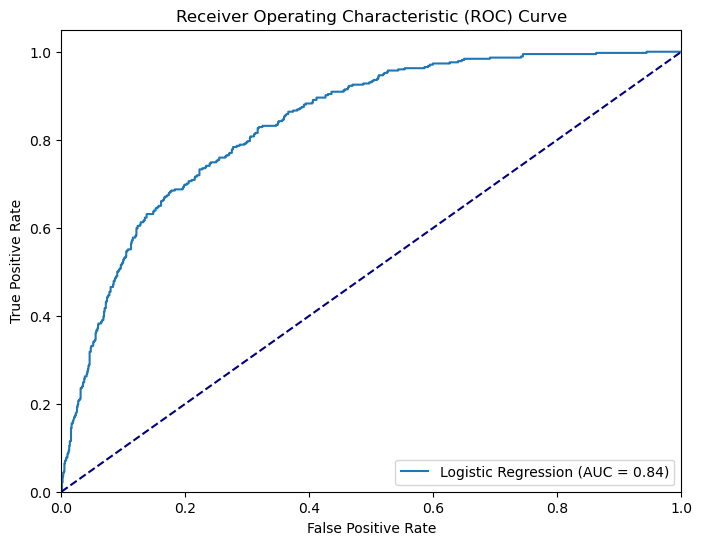

In [261]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Get the predicted probabilities for the positive class (churn=1)
y_prob = my_model.predict_proba(X_test)[:, 1]

# 2. Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 3. Compute the AUC
roc_auc = roc_auc_score(y_test, y_prob)

# 4. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
